# Importing libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

C:\Anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Loading Handwritten digits data set

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

# Problem statement

In [3]:
# This is Handwritten digits classification dataset. The aim is to classify the image in range from 0 to 9.
# This is multiclassification task.
# First attempt is to check with CNN model.

# Basic checks

In [4]:
len(x_train)

60000

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [6]:
# we have 60000 images in x_train and image size is 28 by 28 grid.

In [7]:
len(x_test)

10000

# Data or Image visualization

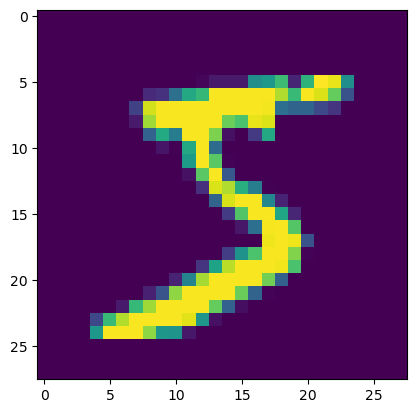

In [8]:
plt.imshow(x_train[0]) 

(28, 28)

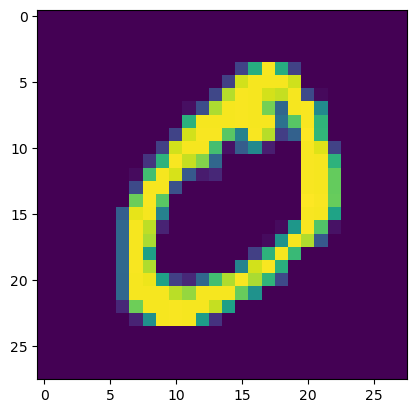

In [9]:
plt.imshow(x_train[1])
x_train[1].shape

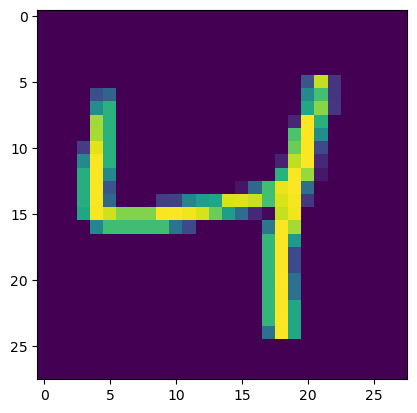

In [10]:
plt.imshow(x_train[2])

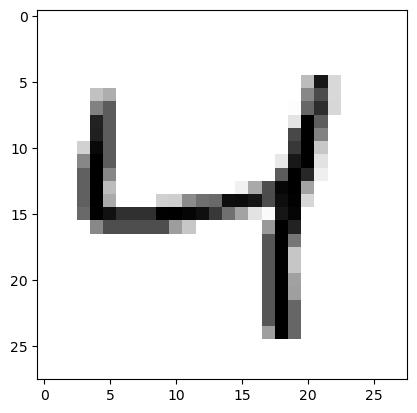

In [11]:
# To check whether it is color image or binary image
plt.imshow(x_train[2], cmap=plt.cm.binary)

# Data pre processing

In [12]:
# Images are not in colored (RGB). They are in single channel (0 to 255)

In [13]:
x_train[0].ndim

2

In [14]:
x_train[0], # Each pixel before normalization.its a two dimensional array
# o is black and 255 is white

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
           0

In [15]:
x_train[0].min()

0

In [16]:
x_train[0].max()

255

# Scaling of the data

In [17]:
# The values are ranging from 0 to 255 which needs to be scaled in between o to 1 before fitting into a model
# There are two ways to scale the data. One is dividing the data by its highest value which is 255. So it should be divided by 255 to get values in between 0 & 1.
# Second one is normalization
# Here proceeded with normalization

In [18]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

In [19]:
x_train[0], # Pixel after normalization

(array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

# CNN model creation

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation

In [21]:
model = Sequential()

# First convolution layer
model.add(Conv2D(64,(3,3),input_shape=(28,28,1))) # 64 filters, Filter size is 3,3.
model.add(Activation("relu")) # relu is for making it Non linear. Coverts all the negative values to zero.
model.add(MaxPooling2D(pool_size=(2,2))) # Pooling is to reduce the spatial dimensions of the input & computational complexity

# Second convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Third convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Fully connected layer 1
model.add(Flatten()) # Flattening is to convert two dimensional array to one dimension. This will be feeded to final neural network
model.add(Dense(64))
model.add(Activation("relu"))

# Fully connected layer 2
model.add(Dense(32))
model.add(Activation("relu"))

# Fully connected layer 3
model.add(Dense(10))
model.add(Activation("softmax"))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

In [23]:
model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'] )

# Fitting Model

In [24]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 54s 28ms/step - loss: 0.2778 - accuracy: 0.9126
Epoch 2/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0902 - accuracy: 0.9728
Epoch 3/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0656 - accuracy: 0.9800
Epoch 4/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0511 - accuracy: 0.9839
Epoch 5/10
1875/1875 [==============================] - 53s 29ms/step - loss: 0.0409 - accuracy: 0.9866
Epoch 6/10
1875/1875 [==============================] - 53s 29ms/step - loss: 0.0343 - accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0289 - accuracy: 0.9907
Epoch 8/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0237 - accuracy: 0.9922
Epoch 9/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0203 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 54s 29m

# Model prediction

In [25]:
y_predict=model.predict(x_test)
y_predict[1]

313/313 [==============================] - 5s 15ms/step


array([2.0864070e-06, 1.9356496e-09, 9.9999762e-01, 2.5448939e-08,
       2.4060609e-10, 1.3957786e-10, 5.2533786e-09, 1.3451617e-07,
       2.1941890e-10, 7.2222768e-08], dtype=float32)

In [26]:
y_predict[1].argmax()

2

In [27]:
y_test[1] 

2

In [28]:
y_predicted_labels = [np.argmax(i) for i in y_predict]
y_predicted_labels[0]

7

# Model evaluation

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,classification_report

In [30]:
Accuracy = accuracy_score(y_test,y_predicted_labels)
Accuracy

0.9884

In [31]:
cm = confusion_matrix(y_test,y_predicted_labels)
cm

array([[ 976,    1,    0,    1,    0,    0,    2,    0,    0,    0],
       [   1, 1131,    0,    1,    0,    0,    1,    0,    1,    0],
       [   3,    0, 1014,    5,    2,    0,    1,    6,    1,    0],
       [   0,    0,    2, 1001,    0,    5,    0,    0,    0,    2],
       [   0,    0,    2,    0,  974,    0,    1,    0,    1,    4],
       [   1,    0,    0,    3,    0,  882,    2,    1,    1,    2],
       [   2,    2,    0,    0,    3,    3,  945,    0,    3,    0],
       [   0,    3,    8,    2,    1,    1,    0, 1008,    2,    3],
       [   0,    0,    1,    2,    1,    0,    0,    1,  965,    4],
       [   1,    0,    0,    0,   10,    5,    1,    1,    3,  988]],
      dtype=int64)

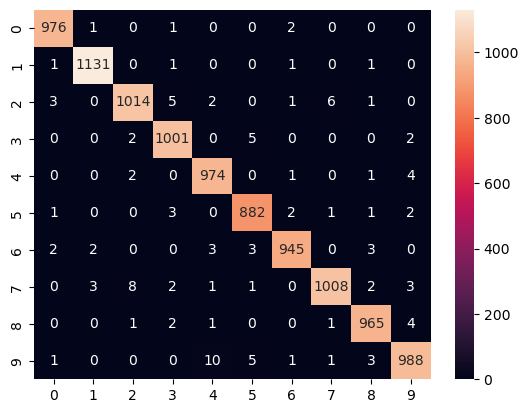

In [32]:
import seaborn as sns
heatmap = sns.heatmap(cm,annot=True,fmt='d')

In [33]:
CR = classification_report(y_test,y_predicted_labels)
print(CR)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

